# Analisis de regresión lineal simple

In [8]:
# Instala librerias

pkg = c("tidyverse", "rstatix", "skimr", "psych", "ggpubr", "e1071")

for (i in pkg) {
  if(eval(bquote(!require(.(i))))) eval(bquote(install.packages(.(i))))
}

Loading required package: rstatix


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Loading required package: skimr

Loading required package: psych


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: ggpubr

Loading required package: e1071



# Visualización de datos

In [5]:
data <- haven::read_sav("https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase9_BaseRegresionLinealSimpleYMultiple.sav")
data

Código,Sexo,Relación,HistVinc,Afroproblema,Afroemoción,Estrés_académico,ZRE_1
<chr>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
001,2,1,6,29.23077,38,45,1.051546027
002,2,0,7,23.84615,45,45,-0.554502312
003,2,0,8,24.61538,50,45,-1.437566240
004,2,0,5,21.53846,45,45,-0.686559040
005,2,1,8,30.00000,49,44,-1.224418179
006,2,1,6,33.07692,48,44,-0.862925974
007,1,0,6,31.53846,44,43,-0.489698396
008,1,1,11,21.53846,36,43,0.421388322
009,2,0,8,22.30769,35,43,0.650823799


`geom_smooth()` using formula = 'y ~ x'


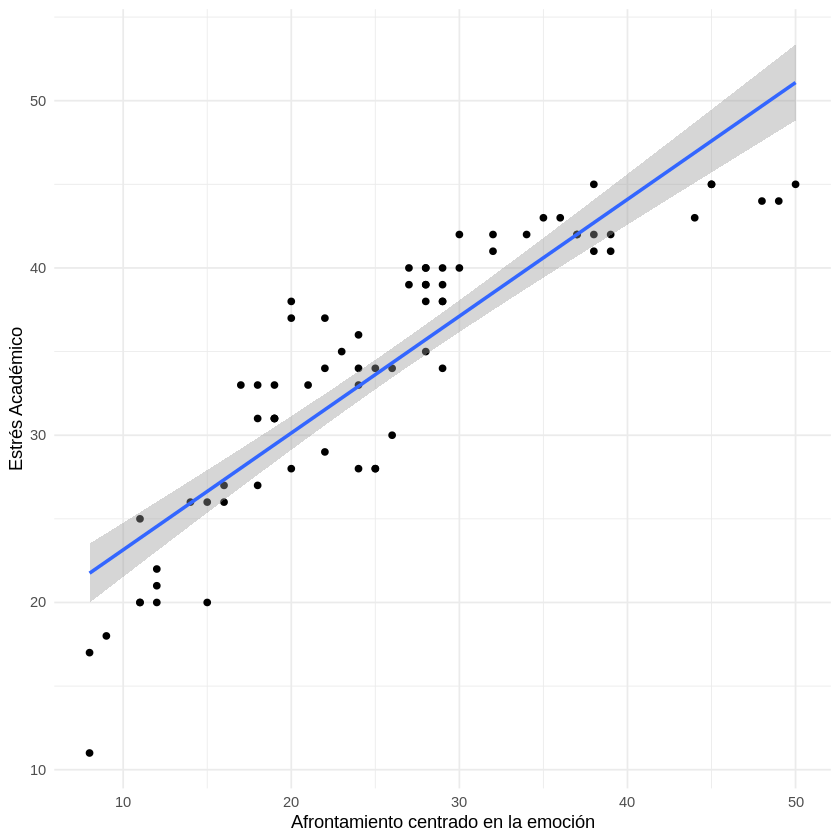

In [6]:
data |> 
  ggplot(aes(x = Afroemoción, y = Estrés_académico)) + 
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Afrontamiento centrado en la emoción",
       y = "Estrés Académico") +
  theme_minimal()

# Verifcación de supuestos

## Linealidad de la relación

In [9]:
library(rstatix)

data |> 
  shapiro_test(Estrés_académico, Afroemoción) |> 
  mutate(normal = case_when(p < .05 ~ F, T ~ T))


variable,statistic,p,normal
<chr>,<dbl>,<dbl>,<lgl>
Afroemoción,0.9712212,0.097620243,TRUE
Estrés_académico,0.9359159,0.001187091,FALSE


In [10]:
data |> 
  select(Afroemoción, Estrés_académico) |> 
  psych::corr.test(method = "spearman")

Warning message in abbreviate(rownames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(colnames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”


Call:psych::corr.test(x = select(data, Afroemoción, Estrés_académico), 
    method = "spearman")
Correlation matrix 
                 Afroemoción Estrés_académico
Afroemoción             1.00             0.94
Estrés_académico        0.94             1.00
Sample Size 
[1] 72
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
                 Afroemoción Estrés_académico
Afroemoción                0                0
Estrés_académico           0                0

 To see confidence intervals of the correlations, print with the short=FALSE option

# Normalidad de residuos

In [11]:
data %>%
  lm("Estrés_académico ~ Afroemoción", data = .) -> model

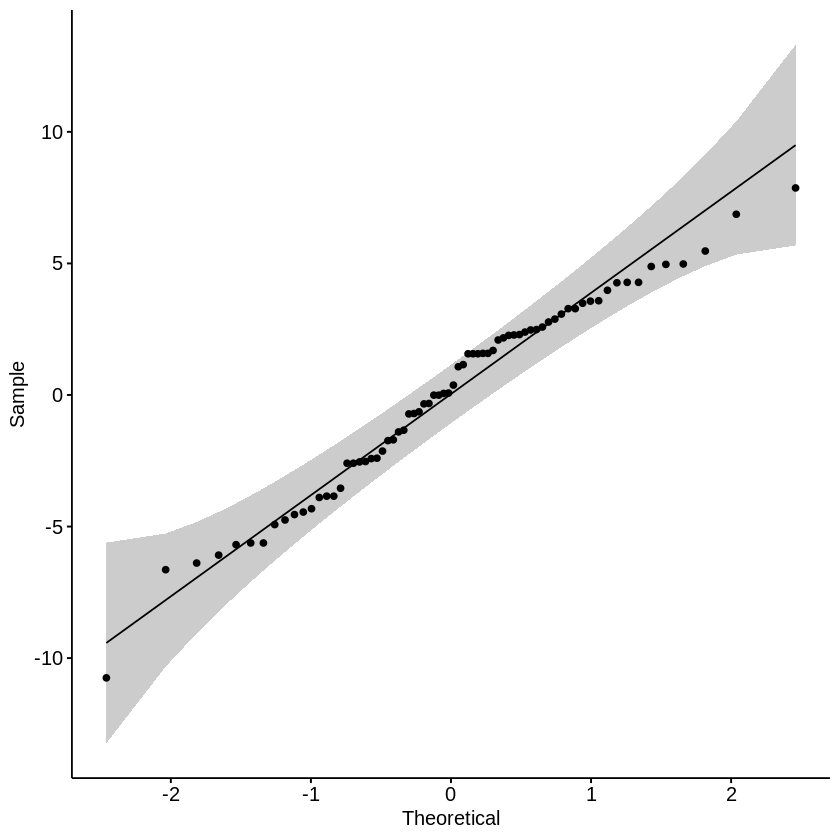

In [12]:
tibble(residuals = model$residuals) |> 
  ggpubr::ggqqplot(x = "residuals")

In [13]:
model$residuals |> 
  shapiro_test()

variable,statistic,p.value
<chr>,<dbl>,<dbl>
model$residuals,0.9766323,0.2000155


# Evaluación del modelo de regresión

In [14]:
model |> summary()


Call:
lm(formula = "Estrés_académico ~ Afroemoción", data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7508  -2.5570   0.2245   2.6291   7.8676 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.16311    1.19745   13.50   <2e-16 ***
Afroemoción  0.69847    0.04324   16.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.751 on 70 degrees of freedom
Multiple R-squared:  0.7885,	Adjusted R-squared:  0.7854 
F-statistic: 260.9 on 1 and 70 DF,  p-value: < 2.2e-16


## Ejercicio 1 

Un grupo de investigadores plantea que el afrontamiento centrado en el problema predice un menor estrés académico percibido por los estudiantes. Para evaluar su hipótesis tomaron una muestra de 72 jóvenes a quienes aplicaron el Inventario de Estimación del Afrontamiento y la Escala de Estrés Académico.

- Indica la hipótesis de estudio, la ecuación del modelo de regresión lineal simple y el signo que debiera tener beta (B) si la hipótesis de estudio fuera cierta.
- Evalúa si habría evidencia a favor de una posible relación entre las variables con un diagrama de dispersión.
- Evalúa la correlación entre las variables.
- Estima los parámetros del modelo de regresión.
- Indica la magnitud del coeficiente de determinación e interpreta su valor.
- Realiza el contraste de hipótesis correspondiente y concluir en función a la hipótesis de estudio.

1. Indicar la ecuación del modelo de regresión lineal simple indicando el signo que debiera tener beta (B) si la hipótesis de estudio fuera cierta.

Hipótesis de estudio: El afrontamiento centrado en el problema predice un menor estrés académico percibido por los estudiantes.
- Variable predictora (X): Afrontamiento centrado en el problema    
- Variable de salida (Y): Estrés académico

Ecuación del modelo de regresión lineal simple:
- $EstrésAcadémico = α + β \times AfrontamientoProblema \pm \epsilon $, con $B<0$

`geom_smooth()` using formula = 'y ~ x'


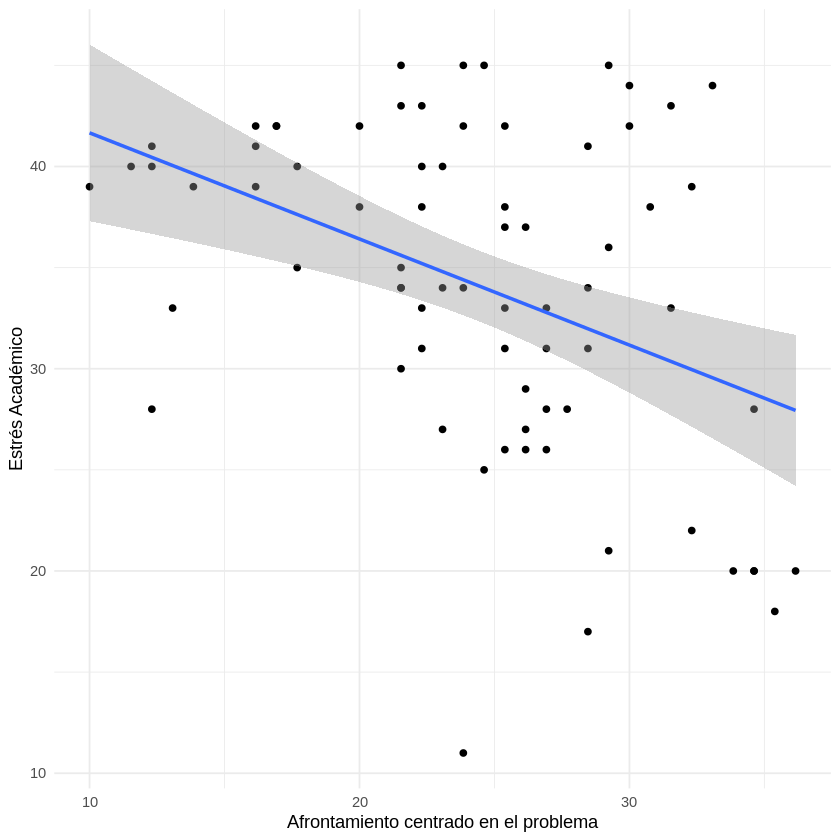

In [15]:
data |> 
  ggplot(aes(x = Afroproblema, y = Estrés_académico)) + 
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Afrontamiento centrado en el problema",
       y = "Estrés Académico") +
  theme_minimal()


3. Evaluar la correlación entre las variables.  
- H0: rxy = 0
- H1: rxy < 0

Prueba de normalidad para aplicar el coeficiente de correlación pertinente.

In [16]:
data |> 
  shapiro_test(Estrés_académico, Afroproblema) |> 
  mutate(normal = case_when(p < .05 ~ F, T ~ T))

variable,statistic,p,normal
<chr>,<dbl>,<dbl>,<lgl>
Afroproblema,0.9741042,0.143365606,TRUE
Estrés_académico,0.9359159,0.001187091,FALSE


In [17]:
data |> 
  select(Afroproblema, Estrés_académico) |> 
  psych::corr.test(method = "spearman")

Warning message in abbreviate(rownames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(colnames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”


Call:psych::corr.test(x = select(data, Afroproblema, Estrés_académico), 
    method = "spearman")
Correlation matrix 
                 Afroproblema Estrés_académico
Afroproblema             1.00            -0.37
Estrés_académico        -0.37             1.00
Sample Size 
[1] 72
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
                 Afroproblema Estrés_académico
Afroproblema                0                0
Estrés_académico            0                0

 To see confidence intervals of the correlations, print with the short=FALSE option

Los resultados del análisis de correlación evidencian que existe una relación estadísticamente significativa, negativa y mediana, según el criterio de Cohen (1988), entre afrontamiento centrado en el problema y estrés académico, r(70) = -.37, p < .001 (unilateral).

4. Estimar los parámetros del modelo de regresión.

In [18]:
data %>%
  lm("Estrés_académico ~ Afroproblema", data = .) -> model2

summary(model2)


Call:
lm(formula = "Estrés_académico ~ Afroproblema", data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.3968  -4.9886  -0.5203   4.5205  14.4468 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   46.9092     3.5161   13.34  < 2e-16 ***
Afroproblema  -0.5247     0.1399   -3.75  0.00036 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.443 on 70 degrees of freedom
Multiple R-squared:  0.1673,	Adjusted R-squared:  0.1554 
F-statistic: 14.07 on 1 and 70 DF,  p-value: 0.0003603


$EstrésAcadémico = 46.909 + -0.525 \times AfrontamientoProblema \pm 7.443 $

5. Indicar la magnitud del coeficiente de determinación e interpretar su valor.

Según Cohen (1988) es un R2 “mediano”. Interpretación: Existe un 16.7% de diferencias en el estrés académico que estarían asociadas al afrontamiento centrado en el problema en los jóvenes estudiantes.

6. Realizar el contraste de hipótesis correspondiente y concluir en función a la hipótesis de estudio.

Hipótesis de estudio: El afrontamiento centrado en el problema predice un menor estrés académico percibido por los estudiantes.
- $H_{0}$: $β = 0$      vs      $H_{1}$: $β < 0$

Se rechaza $H_{0}$, ya que p (unilateral) $.000/2 = <.001$

Luego, como $β = -0.525  < 0$, se  acepta $H_{1}$

Conclusión: 
El afrontamiento centrado en el problema predice significativamente un menor estrés académico percibido por los estudiantes,  $β = -0.525$, $EE_{β} = 0$.14, $t(70) = -3.75$, $p <.001$, existiendo entre ambos una relación significativa con un tamaño de efecto mediano, $R^{2} = .167$, $F(1,70) = 14.07$, $p <.001$. Por tanto, se cumple la hipótesis de investigación.